In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('spam_new.csv')

In [3]:
df.sample(6)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1020,ham,Good afternoon on this glorious anniversary da...,NaN,NaN,NaN
3925,ham,I havent add ?_ yet right..,NaN,NaN,NaN
880,spam,Reminder: You have not downloaded the content ...,NaN,NaN,NaN
2729,spam,Urgent! Please call 09066612661 from your land...,NaN,NaN,NaN
3439,ham,What time you thinkin of goin?,NaN,NaN,NaN
4014,spam,You will be receiving this week's Triple Echo ...,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

## step 1. DATA PREPROCESSING

### 1.1 Dropping unknown columns 

In [6]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [7]:
df.sample(9)

,v1,v2
5536,ham,Aiyah ok wat as long as got improve can alread...
4366,ham,I like dis sweater fr mango but no more my siz...
773,ham,I wil be there with in &lt;#&gt; minutes. Go...
1543,spam,Hello from Orange. For 1 month's free access t...
3167,ham,Ugh hopefully the asus ppl dont randomly do a ...
2603,ham,\Im at arestaurant eating squid! i will be out...
2975,ham,I love u 2 my little pocy bell I am sorry but ...
1186,ham,"Goodmorning, Today i am late for &lt;#&gt; min."
1954,ham,Good night. Am going to sleep.


### 1.2 Renaming column

In [8]:
df.rename(columns={'v1':'target','v2':'messages'},inplace=True)
df.sample(4)

,target,messages
5520,ham,No. I dont want to hear anything
1659,ham,"Yeah, where's your class at?"
168,ham,Great escape. I fancy the bridge but needs her...
4478,ham,Erutupalam thandiyachu


### 1.3 taget col --> id 
 - categorical labels into numeric values

### fit :-
-  it means"fitting" is like learning the recipe from your data.
- you're teaching it to understand patterns, relationships, or rules based on your data.
### Transform :-
- Once you’ve learned the recipe (fit), now it’s time to cook! Transform means applying what you’ve learned to actually change the data.

   So, in layman’s terms:

Fit = Learn from the data.
Transform = Apply that learning to change the data.

In [9]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
encoder=LabelEncoder()

# Fit and transform the labels to numeric values
df['target']=encoder.fit_transform(df['target'])

df.head()
#ham-->0
#spam-->1

,target,messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### 1.4 remove redundant data

In [10]:
df=df.drop_duplicates(keep='first')

In [11]:
df.duplicated().sum()

np.int64(0)

##  2.EDA

### 2.1 How much is ham and spam .

In [12]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

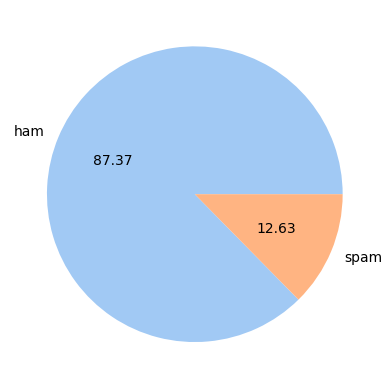

In [13]:
palette_color = sns.color_palette('pastel') 
plt.pie(df['target'].value_counts(), labels=['ham','spam'],colors=palette_color,autopct="%0.2f")
# displaying chart
plt.show() 

In [14]:
# data is imbalanced.

### 2.2 how much alphabets , words, sentences are used

In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prate\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
df['num_char']=df['messages'].apply(len)
df.head()

,target,messages,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\prate\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [22]:
#for words and sentence
df['num_words']=df['messages'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentence']=df['messages'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [23]:
df.head()

,target,messages,num_char,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
df[['num_char','num_words','num_sentence']].describe()

,num_char,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.923389,18.619462,2.017605
std,58.174300,13.413743,1.485964
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,2.000000
75%,117.000000,26.000000,3.000000
max,910.000000,220.000000,38.000000


In [25]:
# Filter for 'ham' messages (where target is 0)
df[df['target'] == 0][['num_char', 'num_words', 'num_sentence']].describe()


,num_char,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.456377,17.241143,1.876661
std,56.356091,13.548832,1.430122
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
# Filter for 'sham' messages (where target is 1)
df[df['target'] == 1][['num_char', 'num_words', 'num_sentence']].describe()


,num_char,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.479326,28.151608,2.992343
std,30.014336,7.128960,1.499980
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,33.000000,4.000000
max,223.000000,47.000000,9.000000


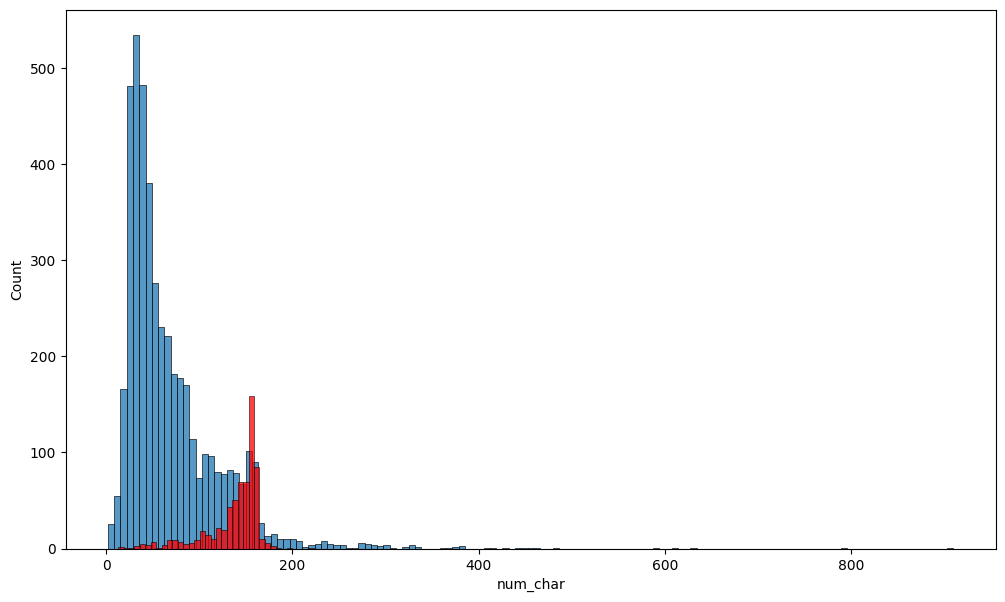

In [27]:
plt.figure(figsize=(12,7))
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color="red")
plt.show()

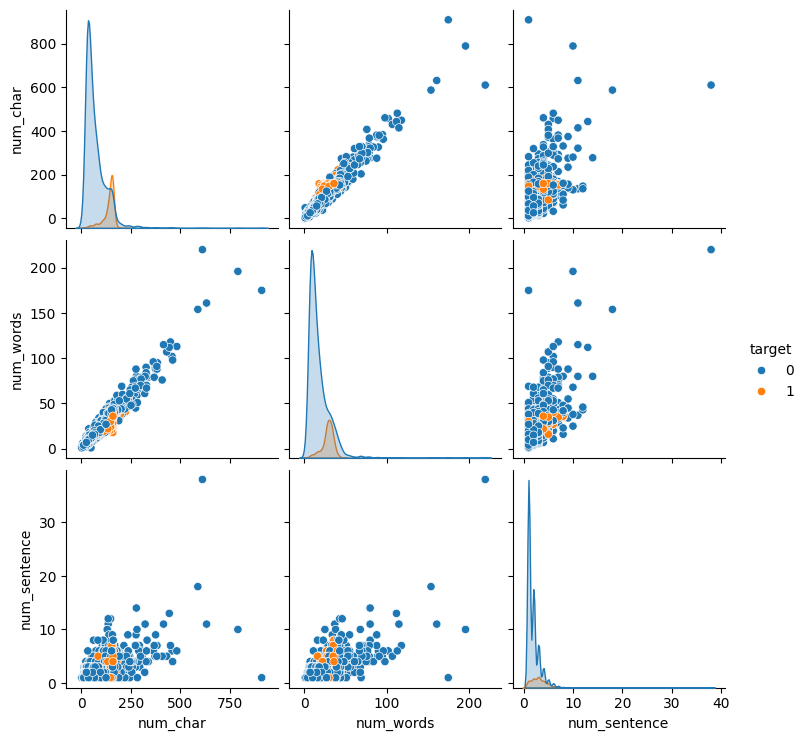

In [28]:
sns.pairplot(df,kind='scatter',hue='target') #corelation

In [29]:
cr=df['num_words'].corr(df['num_sentence'])
print(cr)

0.6742299388107502


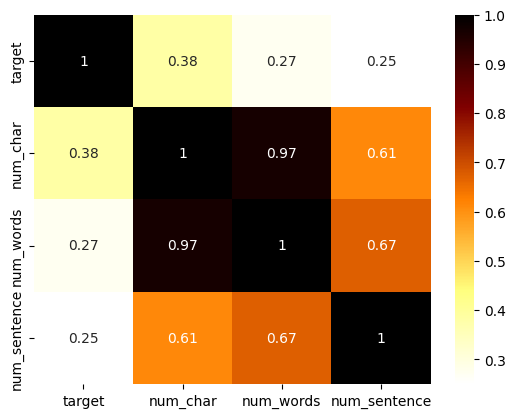

In [30]:
# sns.heatmap(df.corr())
df_numeric = df.select_dtypes(include='number')
# Generate heatmap for correlation matrix
sns.heatmap(df_numeric.corr(), annot=True,cmap="afmhot_r")
plt.show()

In [31]:
# print(plt.colormaps()) 

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', '

# 3 Data Prerpocessing for message column
- Lower case
- Tokenization
- Removing Special characters
- Removing stop words and punctuations
- Stemming

1 lower case

In [32]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords')
ps=PorterStemmer()

def transform_text(value):
    value= value.lower()
    # Breaks text into smaller units called tokens.
    value=nltk.word_tokenize(value)
    
    # Removing special characters and keeping only alphanumeric tokens.
    stop_words=set(stopwords.words('english'))
    y = []
    for i in value:
        if i.isalnum() and i not in stop_words and i not in string.punctuation:  # Check if the token is alphanumeric
            y.append(ps.stem(i)) # stemming
    
    return " ".join(y)  # Return the cleaned list of tokens


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prate\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
transform_text("Hi! I am very lovable , jouful,musically person in the wordl.")

'hi lovabl jouful music person wordl'

In [34]:
# df['transormed_text']=transform_text(df['messages'])
df['transformed_text']=df['messages'].apply(transform_text)

## 3.1 converting Spam sentences into words.


In [35]:
df.head(2)

,target,messages,num_char,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni


In [36]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for wrds in msg.split():
        spam_corpus.append(wrds)
        
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for wrds in msg.split():
        ham_corpus.append(wrds)


In [37]:
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'way',
 'u',
 

C:\Users\prate\AppData\Local\Temp\ipykernel_14884\1295578319.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=values, palette='viridis')  # Pass x and y data separately


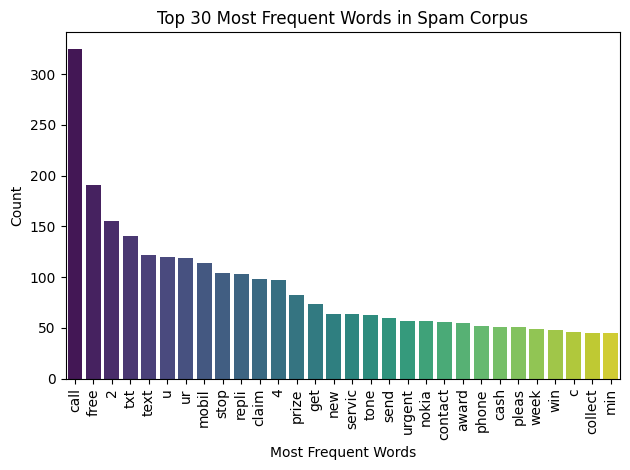

In [38]:
from collections import Counter
# Assuming you have the spam_corpus data available

# Create a DataFrame from the Counter's most common words and their counts
data = pd.DataFrame(Counter(spam_corpus).most_common(30))

# Separate the data into columns for x (categories) and y (values)
categories = data[0]  # First column contains category labels (words)
values = data[1]      # Second column contains word counts

# Create the bar plot using Seaborn
sns.barplot(x=categories, y=values, palette='viridis')  # Pass x and y data separately

# Optional customizations (adjust as needed)
plt.xticks(rotation='vertical')  # Rotate x-axis labels for better readability
plt.xlabel('Most Frequent Words')  # Add a label for the x-axis
plt.ylabel('Count')              # Add a label for the y-axis
plt.title('Top 30 Most Frequent Words in Spam Corpus')  # Add a title for the plot
plt.tight_layout()               # Adjust spacing for better visualization

plt.show()

# 4.Model Building
- using naivye byse.
- Naive Bayes is a probabilistic machine learning algorithm commonly used for classification tasks.

Step:-
- Converting text into numbers using (Bag of words).
- Add it to naive byse.
- check performance

In [39]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)
# this is for Countvectotr
# x=cv.fit_transform(df['transformed_text']).toarray()
# x.shape
x=tfidf.fit_transform(df['transformed_text']).toarray()
x.shape


(5169, 3000)

In [40]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

## 4.1 Train Test splitting

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [42]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [43]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

### short 
1. Accuracy tells you how many predictions were correct overall.
2. Confusion Matrix shows you the breakdown of correct and incorrect predictions in more detail.
3. Precision tells you how accurate the positive predictions are.

In [44]:
gnb.fit(X_train,Y_train) #This line is where you train (or "fit") the gnb model using the training data (X_train) and the corresponding labels (Y_train).
y_pred1=gnb.predict(X_test) #The predicted labels are stored in y_pred1.

print(accuracy_score(Y_test,y_pred1)) #Accuracy tells you how many predictions were correct out of the total number of predictions.#(1 means 100% accuracy), prints number between 0 and 1.
print(confusion_matrix(Y_test,y_pred1)) #It gives you a better picture of which specific predictions the model got right or wrong.
print(precision_score(Y_test,y_pred1)) #Precision focuses on the positive predictions and tells you how many of the positive predictions were actually correct.

0.8723404255319149
[[788 108]
 [ 24 114]]
0.5135135135135135


This suggests that if you're focusing on correctly identifying positive cases, you may need to improve the model to reduce the number of False Positives (FP).

In [45]:
mnb.fit(X_train,Y_train) #This line is where you train (or "fit") the gnb model using the training data (X_train) and the corresponding labels (Y_train).
y_pred1=mnb.predict(X_test) #The predicted labels are stored in y_pred1.

print(accuracy_score(Y_test,y_pred1)) #Accuracy tells you how many predictions were correct out of the total number of predictions.#(1 means 100% accuracy), prints number between 0 and 1.
print(confusion_matrix(Y_test,y_pred1)) #It gives you a better picture of which specific predictions the model got right or wrong.
print(precision_score(Y_test,y_pred1)) #Precision focuses on the positive predictions and tells you how many of the positive predictions were actually correct.

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


### confusion matrix
The confusion matrix provides more detailed insights:

1. First row [872, 24]:

- 872: The model correctly predicted 872 non-spam messages (True Negatives, TN).
- 24: The model incorrectly predicted 24 non-spam messages as spam (False Positives, FP).

2. Second row [12, 126]:

- 12: The model incorrectly predicted 12 spam messages as non-spam (False Negatives, FN).
- 126: The model correctly predicted 126 spam messages (True Positives, TP).


In [46]:
bnb.fit(X_train,Y_train) #This line is where you train (or "fit") the gnb model using the training data (X_train) and the corresponding labels (Y_train).
y_pred1=bnb.predict(X_test) #The predicted labels are stored in y_pred1.
print(accuracy_score(Y_test,y_pred1)) #Accuracy tells you how many predictions were correct out of the total number of predictions.#(1 means 100% accuracy), prints number between 0 and 1.
print(confusion_matrix(Y_test,y_pred1)) #It gives you a better picture of which specific predictions the model got right or wrong.
print(precision_score(Y_test,y_pred1)) #Precision focuses on the positive predictions and tells you how many of the positive predictions were actually correct.

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [47]:
# We will choose mnb and bnb. 

In [48]:
!pip install xgboost



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Using others model to check which is the best one.

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier # for improvement.
# from sklearn.datasets import load_iris


In [50]:
# Initialize the models with some parameters.
lrc= LogisticRegression(solver='liblinear',penalty='l1')
svc=SVC(kernel='sigmoid',gamma=1.0)
mnb= MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
knc=KNeighborsClassifier()
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbc=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

# Load dataset
# X, y = load_iris(return_X_y=True)


In [51]:
# Dictionary of classifiers

clfs = {
    'SVC': svc,                 
    'KNN': knc,                
    'NB': mnb,                   
    'DT': dtc,                  
    'LR': lrc,                   
    'RF': rfc,                   
    'AdB': abc,            
    'BC': bc,               
    'ETC': etc,           
    'GBDT': gbc,     
    'XGB': xgb               
}

# Key: The identifier used to access a value in a dictionary.
# Value: The data or object associated with a key in the dictionar.



In [52]:
def train_classifier(clf,X_train,X_test,Y_train,Y_test):
    clf.fit(X_train,Y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(Y_test,y_pred)
    precision=precision_score(Y_test,y_pred)
    return accuracy,precision
    

In [53]:
train_classifier(svc,X_train,X_test,Y_train,Y_test)


(0.9748549323017408, np.float64(0.9745762711864406))

In [54]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    curr_acc,curr_prec = train_classifier(clf,X_train,X_test,Y_train,Y_test)
    print("For",name)
    print("Accuracy ",curr_acc)
    print("Precision",curr_prec)

    accuracy_scores.append(curr_acc)
    precision_scores.append(curr_prec)

For SVC
Accuracy  0.9748549323017408
Precision 0.9745762711864406
For KNN
Accuracy  0.90715667311412
Precision 1.0
For NB
Accuracy  0.971953578336557
Precision 1.0
For DT
Accuracy  0.9332688588007737
Precision 0.8415841584158416
For LR
Accuracy  0.9564796905222437
Precision 0.9696969696969697
For RF
Accuracy  0.9748549323017408
Precision 0.9827586206896551


C:\Users\prate\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdB
Accuracy  0.9671179883945842
Precision 0.9482758620689655
For BC
Accuracy  0.960348162475822
Precision 0.8702290076335878
For ETC
Accuracy  0.9796905222437138
Precision 0.9834710743801653
For GBDT
Accuracy  0.9477756286266924
Precision 0.9285714285714286
For XGB
Accuracy  0.9729206963249516
Precision 0.9435483870967742


In [55]:
performance_df=pd.DataFrame({'Algorithm: ':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})

In [56]:
peperformance_df_sorted = performance_df.sort_values(by='Precision', ascending=False)
peperformance_df_sorted 

,Algorithm:,Accuracy,Precision
1,KNN,0.907157,1.000000
2,NB,0.971954,1.000000
8,ETC,0.979691,0.983471
5,RF,0.974855,0.982759
0,SVC,0.974855,0.974576
4,LR,0.956480,0.969697
6,AdB,0.967118,0.948276
10,XGB,0.972921,0.943548
9,GBDT,0.947776,0.928571
7,BC,0.960348,0.870229


### Top 5 models i keep :-
- NB
- RF
- SVC
- ETC
  

# 5.Improve model
1. Change the max_feature params of Tfidf